Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeiras linhas do conjunto de treino:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Informações do conjunto de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 1

None

Estatísticas descritivas do conjunto de treino:


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


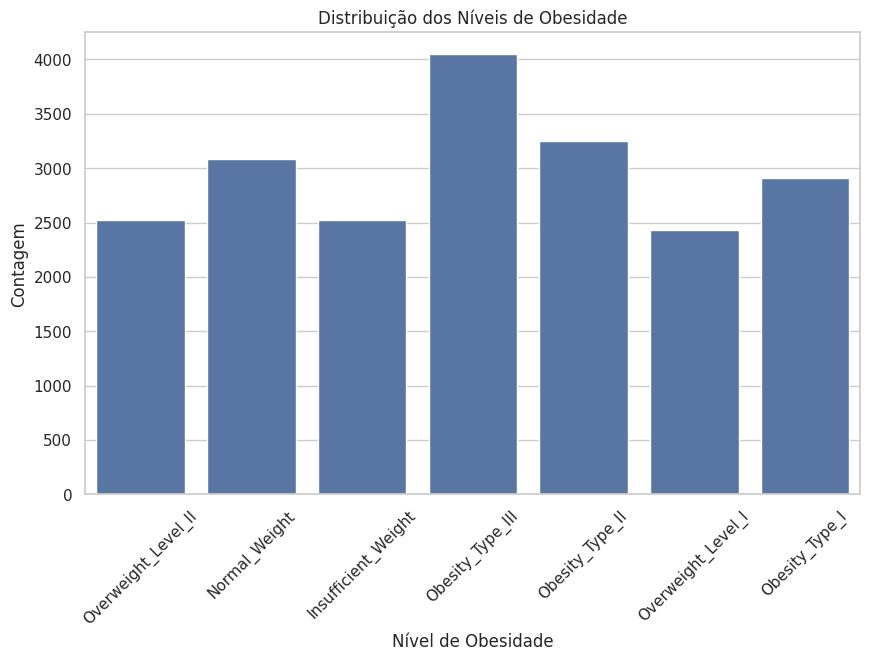

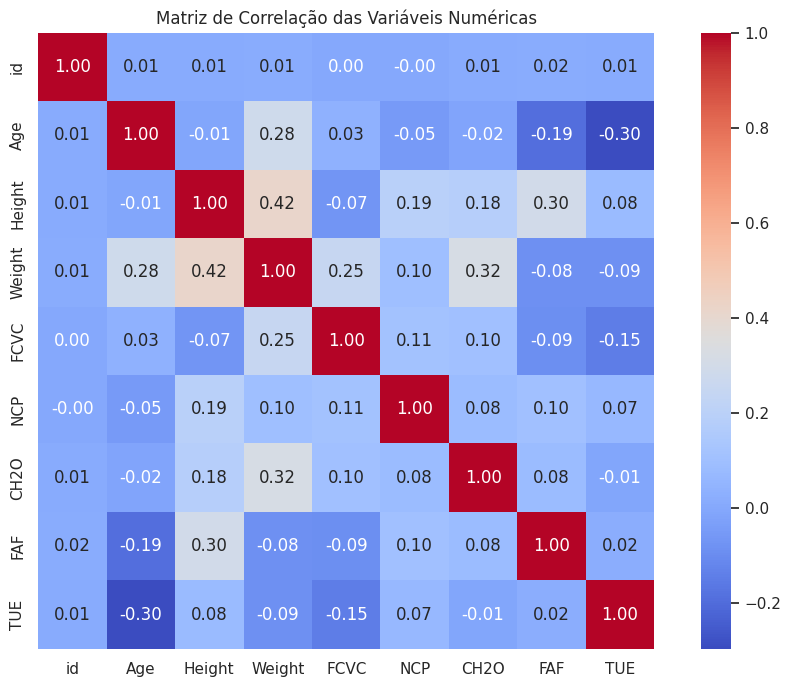

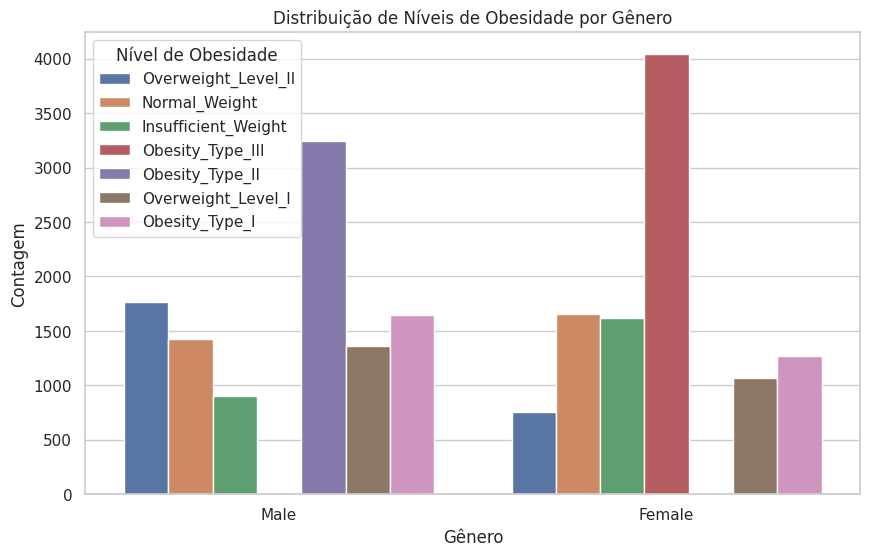

Accuracy: 0.8976396917148363

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.91      0.93       524
      Normal_Weight       0.83      0.89      0.86       626
     Obesity_Type_I       0.89      0.88      0.88       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.75      0.76       484
Overweight_Level_II       0.80      0.80      0.80       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



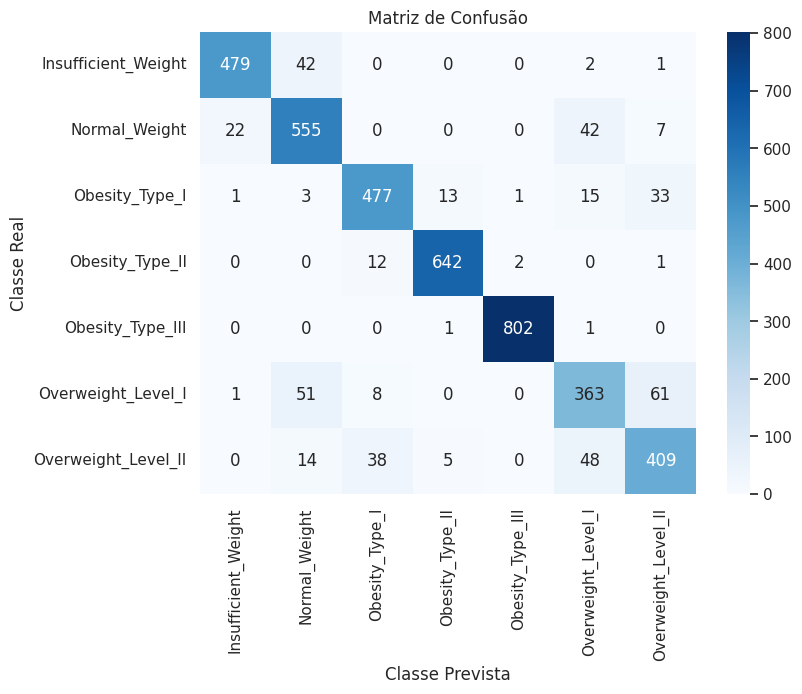

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Montando o Google Drive e carregando os dados
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/Obesidade/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Obesidade/test.csv')

# Visualizar as primeiras linhas
print('Primeiras linhas do conjunto de treino:')
display(train.head())

# Resumo das informações
print('Informações do conjunto de treino:')
display(train.info())

# Estatísticas descritivas
print('Estatísticas descritivas do conjunto de treino:')
display(train.describe())

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Gráfico de contagem para a variável NObesidade
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='NObeyesdad')
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Selecionando as colunas numéricas
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlação
correlation_matrix = train[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Gráfico de contagem para a variável 'Gender' em relação a NObesidade
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Gender', hue='NObeyesdad')
plt.title('Distribuição de Níveis de Obesidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Nível de Obesidade')
plt.show()

# Removendo duplicatas
train = train.drop_duplicates()

# Codificando variáveis categóricas
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
train = pd.get_dummies(train, columns=columns, drop_first=True)
test = pd.get_dummies(test, columns=columns, drop_first=True)

# Usando LabelEncoder para outras variáveis categóricas
le = LabelEncoder()
for col in ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']:
    train[col] = le.fit_transform(train[col])

# Transformação de variáveis numéricas
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)
train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

# Separando variáveis de entrada e saída, e dividindo em treino e teste
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Avaliando o modelo
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))  # Adicionando os nomes das classes

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)  # Adicionando os rótulos das classes
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeiras linhas do conjunto de treino:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  

None


Melhores parâmetros para o KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Avaliação do KNN otimizado:
Acurácia do KNN: 0.9144050104384134
Relatório de Classificação do KNN:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.66      0.73      0.69        78
           2       0.72      0.75      0.73       106
           3       0.98      0.95      0.96       255
           4       1.00      1.00      1.00       822
           5       0.66      0.63      0.65        90
           6       0.58      0.60      0.59        55

    accuracy                           0.91      1437
   macro avg       0.78      0.78      0.78      1437
weighted avg       0.92      0.91      0.92      1437



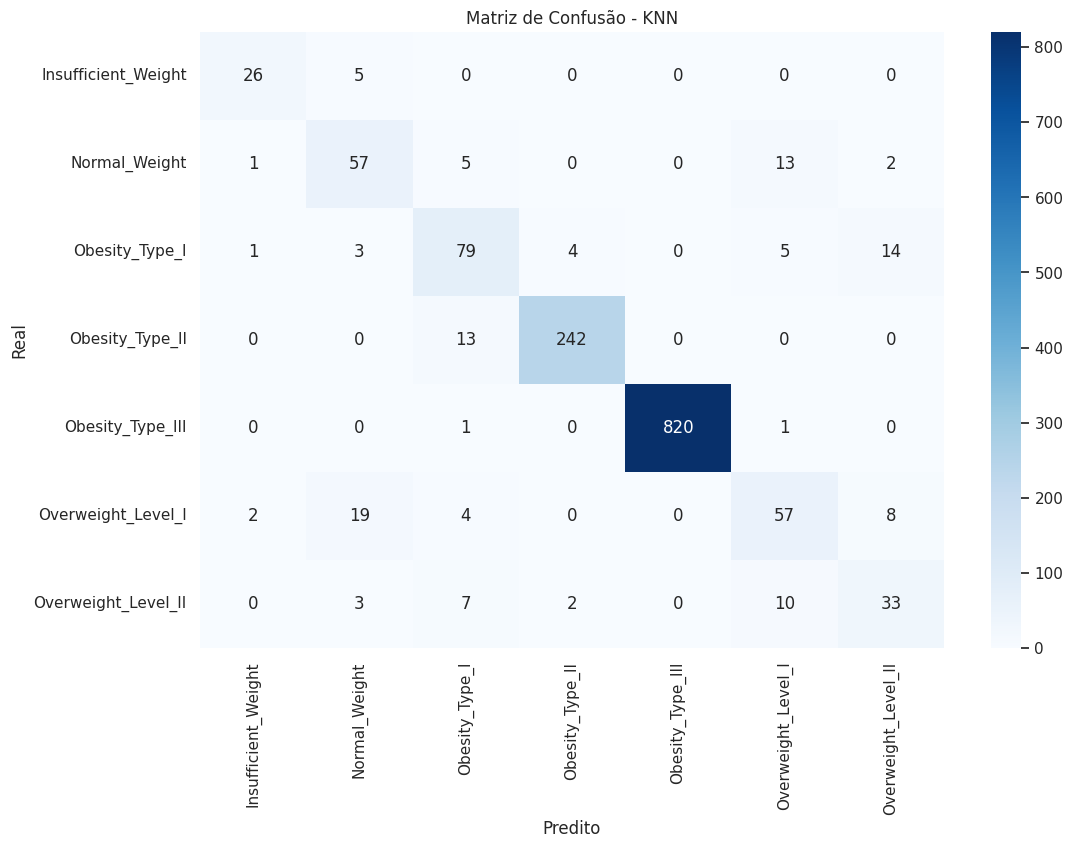


Melhores parâmetros para a Árvore de Decisão: {'class_weight': {0: 5.779678068410463, 1: 2.3382173382173383, 2: 1.8780647270349788, 3: 0.8014787946428571, 4: 0.25551503291229316, 5: 2.318401937046005, 6: 3.6476190476190475}, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Avaliação da Árvore de Decisão otimizada:
Acurácia da Árvore de Decisão: 0.942936673625609
Relatório de Classificação da Árvore de Decisão:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.87      0.85      0.86        78
           2       0.79      0.83      0.81       106
           3       0.99      0.96      0.98       255
           4       1.00      0.99      0.99       822
           5       0.76      0.77      0.76        90
           6       0.71      0.76      0.74        55

    accuracy                           0.94      1437
   macro avg       0.86      0.87      0.86      1437
weighted avg       0.94 

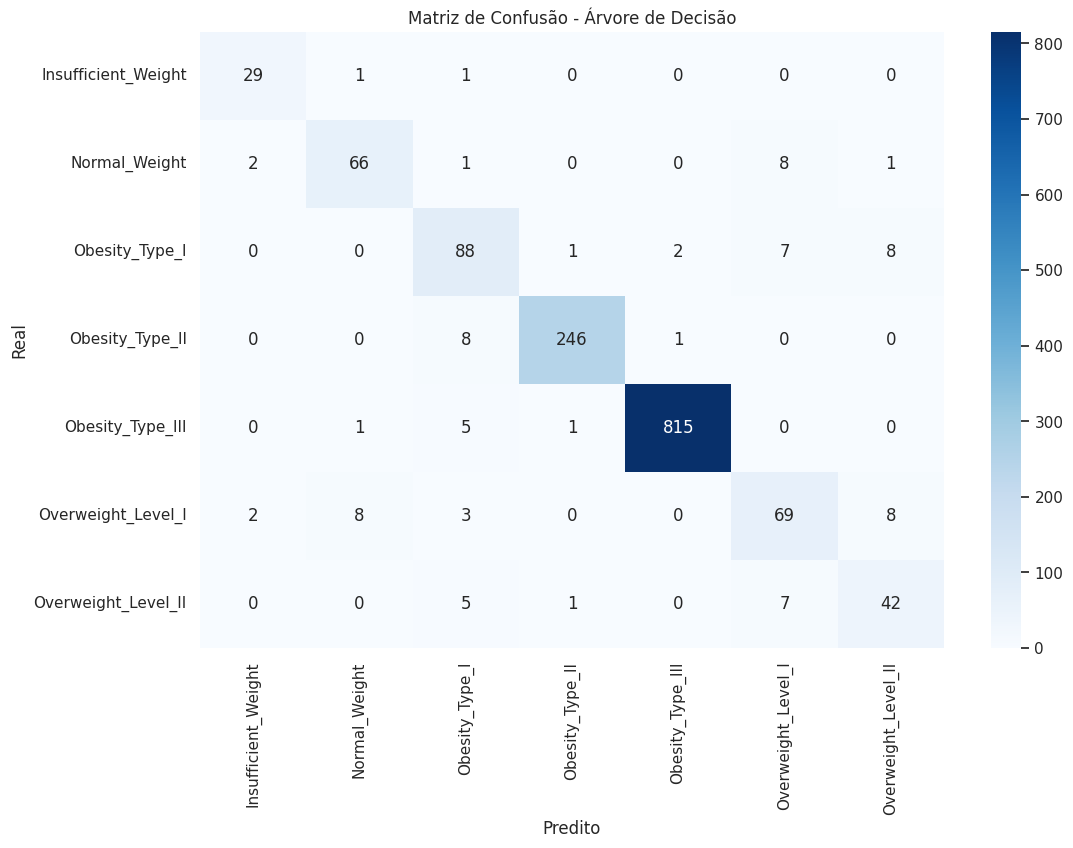

In [ ]:
## KNN e árvore de decisão com hiperparametros
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
import warnings

warnings.filterwarnings("ignore")

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho para os arquivos no Google Drive
train_path = '/content/drive/MyDrive/Obesidade/train.csv'
test_path = '/content/drive/MyDrive/Obesidade/test.csv'

# Carregando os dados
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Removendo a coluna id, pois é irrelevante
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# Exibindo informações básicas
print("Primeiras linhas do conjunto de treino:")
display(train.head())
print("\nInformações gerais do dataset:")
display(train.info())

# Removendo duplicatas
train = train.drop_duplicates()

# Selecionando colunas numéricas e categóricas
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
train = pd.get_dummies(train, columns=columns, drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=columns, drop_first=True, dtype=int)

# Garantindo consistência entre treino e teste
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[train.columns.drop('NObeyesdad')]

# Aplicando LabelEncoder nas variáveis categóricas
le = LabelEncoder()
categorical_to_encode = ['CAEC', 'CALC', 'MTRANS']
for col in categorical_to_encode:
    train[col] = le.fit_transform(train[col])

# Ajustando o LabelEncoder para o conjunto de teste
for col in categorical_to_encode:
    test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    le_classes = np.append(le.classes_, 'Unknown')  # Adiciona a nova classe
    le.classes_ = le_classes
    test[col] = le.transform(test[col])

# Encoding para o alvo
train['NObeyesdad'] = le.fit_transform(train['NObeyesdad'])

# Normalizando os dados
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

# Removendo outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

# Dividindo em features e target
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balanceamento de classes com SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Computando pesos das classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# ===============================
# 1. Otimização de Hiperparâmetros com GridSearchCV para o KNN
# ===============================

# Definindo os parâmetros a serem otimizados para o KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'p': [1, 2],  # 1 para Manhattan, 2 para Euclidiana
    'weights': ['uniform', 'distance']
}

# Realizando a busca em grade para o KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_smote, y_train_smote)

# Melhor combinação de parâmetros do KNN
print("\nMelhores parâmetros para o KNN:", grid_knn.best_params_)

# Predição com o melhor modelo do KNN
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

# Resultados de avaliação do KNN
print("\nAvaliação do KNN otimizado:")
print('Acurácia do KNN:', accuracy_score(y_test, y_pred_knn))
print('Relatório de Classificação do KNN:\n', classification_report(y_test, y_pred_knn))

# Matriz de Confusão do KNN
plt.figure(figsize=(12, 8))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN')
plt.show()


# ===============================
# 2. Otimização de Hiperparâmetros com GridSearchCV para a Árvore de Decisão
# ===============================

# Definindo os parâmetros a serem otimizados para a Árvore de Decisão
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [class_weight_dict, None]
}

# Realizando a busca em grade para a Árvore de Decisão
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_smote, y_train_smote)

# Melhor combinação de parâmetros da Árvore de Decisão
print("\nMelhores parâmetros para a Árvore de Decisão:", grid_dt.best_params_)

# Predição com o melhor modelo da Árvore de Decisão
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

# Resultados de avaliação da Árvore de Decisão
print("\nAvaliação da Árvore de Decisão otimizada:")
print('Acurácia da Árvore de Decisão:', accuracy_score(y_test, y_pred_dt))
print('Relatório de Classificação da Árvore de Decisão:\n', classification_report(y_test, y_pred_dt))

# Matriz de Confusão da Árvore de Decisão
plt.figure(figsize=(12, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeiras linhas do conjunto de treino:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  

None

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Melhores Hiperparâmetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Acurácia: 0.9624217118997912
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.86      0.83      0.84        78
           2       0.91      0.92      0.91       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.82      0.84      0.83        90
           6       0.78      0.78      0.78        55

    accuracy                           0.96      1437
   macro avg       0.90      0.90      0.90      1437
weighted avg       0.96      0.96      0.96      1437



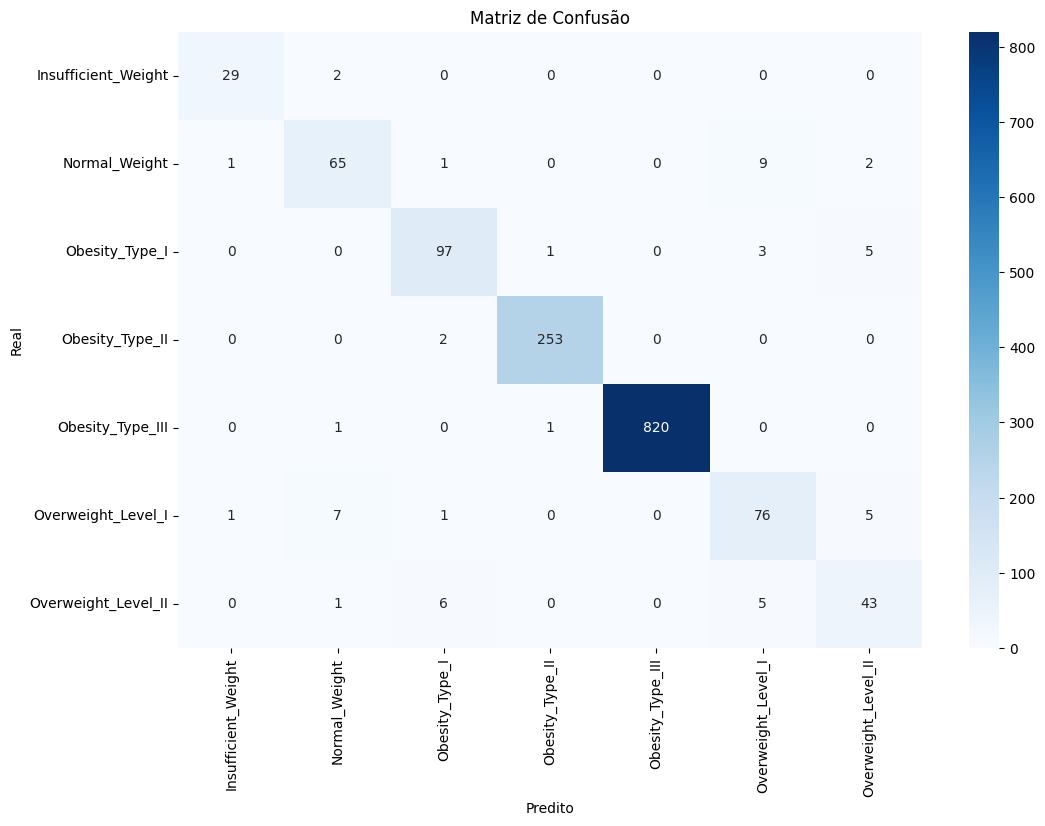

Gender (Male/Female): Male
Age: 25
Height (in meters): 1.80
Weight (in kg): 90
Family history with overweight (yes/no): no
Frequent consumption of high caloric food (yes/no): no
Frequency of consumption of vegetables (0-3): 2
Number of main meals (1-5): 5
Consumption of food between meals (Sometimes/Frequently/Always/No): no
Do you smoke? (yes/no): no
Daily water consumption (liters): 5
Monitor consumption of calories (yes/no): no
Physical activity frequency (days per week): 2
Time using technology devices (hours per day): 8
Consumption of alcohol (Sometimes/Frequently/Always/No): no
Transportation used (Public_Transportation/Walking/Bike/Motorbike/Automobile): Automobile
IMC: 27.78 - Categoria: Sobrepeso
Número de registros após remoção de duplicatas: 20758
Classificação do registro: Obesity_Type_I


In [7]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings

# Ignorando avisos de execução, para não poluir a saída
warnings.filterwarnings("ignore")

# Montando o Google Drive para acessar os arquivos armazenados
drive.mount('/content/drive')

# Caminho para os arquivos CSV do Google Drive
train_path = '/content/drive/MyDrive/Obesidade/train.csv'
test_path = '/content/drive/MyDrive/Obesidade/test.csv'

# Carregando os dados de treinamento e teste
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Removendo a coluna 'id' que é irrelevante para a modelagem
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# Exibindo as primeiras linhas do conjunto de treino e informações gerais do dataset
print("Primeiras linhas do conjunto de treino:")
display(train.head())  # Mostra as primeiras linhas do conjunto de treino
print("\nInformações gerais do dataset:")
display(train.info())  # Exibe detalhes sobre o dataset, como tipos de dados e contagem de valores não nulos

# Removendo duplicatas do conjunto de dados de treino
train = train.drop_duplicates()

# Definindo as colunas que são categóricas e precisam ser transformadas em variáveis dummy
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
# Convertendo variáveis categóricas em variáveis dummy (0 ou 1) nos conjuntos de treino e teste
train = pd.get_dummies(train, columns=columns, drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=columns, drop_first=True, dtype=int)

# Garantindo que as colunas de treino e teste estejam consistentes
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Adiciona as colunas faltantes no conjunto de teste com valor 0
test = test[train.columns.drop('NObeyesdad')]  # Remove qualquer coluna extra que possa existir no conjunto de teste

# Usando o LabelEncoder para transformar variáveis categóricas em números
le = LabelEncoder()
categorical_to_encode = ['CAEC', 'CALC', 'MTRANS']
# Codificando as variáveis categóricas no conjunto de treino
for col in categorical_to_encode:
    train[col] = le.fit_transform(train[col])

# Ajustando o LabelEncoder para o conjunto de teste
for col in categorical_to_encode:
    if col in test.columns:
        # Garante que o conjunto de teste tenha as mesmas classes que o conjunto de treino
        test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
        le_classes = np.append(le.classes_, 'Unknown')  # Adiciona a nova classe 'Unknown'
        le.classes_ = le_classes
        test[col] = le.transform(test[col])

# Codificando a variável alvo (target) no conjunto de treino
train['NObeyesdad'] = le.fit_transform(train['NObeyesdad'])

# Normalizando os dados com o PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)  # Removendo a coluna alvo
train_features_scaled = pt.fit_transform(train_features)  # Aplicando a normalização nos dados

# Criando um DataFrame com os dados normalizados e a coluna alvo
train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

# Função para remover outliers usando o intervalo interquartil (IQR)
def remove_outliers(data):
    Q1 = data.quantile(0.25)  # Primeiro quartil
    Q3 = data.quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    # Remover as linhas que têm valores fora de 1.5 vezes o IQR acima ou abaixo dos quartis
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

# Removendo outliers dos dados normalizados
train_scaled = remove_outliers(train_scaled)

# Separando as variáveis independentes (features) e a variável alvo (target)
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os hiperparâmetros para o RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Número de árvores no Random Forest
    'max_depth': [None, 10, 20, 30],   # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],   # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de amostras para ser um nó folha
    'bootstrap': [True, False],        # Se a amostragem com reposição será usada
}

# Criando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Usando RandomizedSearchCV para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,  # Número de combinações a serem testadas
    scoring='accuracy',  # Métrica de avaliação
    cv=3,  # Número de divisões para validação cruzada
    random_state=42,
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=2  # Exibir informações sobre o progresso
)

# Treinando o modelo com a busca por hiperparâmetros
random_search.fit(X_train, y_train)

# Melhor modelo encontrado após a busca
best_rf = random_search.best_estimator_

# Avaliação do modelo no conjunto de teste
y_pred = best_rf.predict(X_test)  # Realizando previsões no conjunto de teste
print('Melhores Hiperparâmetros:', random_search.best_params_)  # Mostrando os melhores hiperparâmetros encontrados
print('Acurácia:', accuracy_score(y_test, y_pred))  # Avaliando a acurácia
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))  # Exibindo o relatório de classificação

# Gerando a Matriz de Confusão
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Função para capturar dados de entrada do usuário
def capturar_dados_entrada():
    dados = {}
    dados['Gender'] = input("Gender (Male/Female): ")
    dados['Age'] = float(input("Age: "))
    dados['Height'] = float(input("Height (in meters): "))
    dados['Weight'] = float(input("Weight (in kg): "))
    dados['family_history_with_overweight'] = input("Family history with overweight (yes/no): ")
    dados['FAVC'] = input("Frequent consumption of high caloric food (yes/no): ")
    dados['FCVC'] = float(input("Frequency of consumption of vegetables (0-3): "))
    dados['NCP'] = float(input("Number of main meals (1-5): "))
    dados['CAEC'] = input("Consumption of food between meals (Sometimes/Frequently/Always/No): ")
    dados['SMOKE'] = input("Do you smoke? (yes/no): ")
    dados['CH2O'] = float(input("Daily water consumption (liters): "))
    dados['SCC'] = input("Monitor consumption of calories (yes/no): ")
    dados['FAF'] = float(input("Physical activity frequency (days per week): "))
    dados['TUE'] = float(input("Time using technology devices (hours per day): "))
    dados['CALC'] = input("Consumption of alcohol (Sometimes/Frequently/Always/No): ")
    dados['MTRANS'] = input("Transportation used (Public_Transportation/Walking/Bike/Motorbike/Automobile): ")

    return pd.DataFrame([dados])

# Função para calcular o IMC e sua categoria
def calcular_imc(weight, height):
    imc = weight / (height ** 2)
    if imc < 18.5:
        categoria = "Abaixo do peso"
    elif 18.5 <= imc < 24.9:
        categoria = "Normal"
    elif 25.0 <= imc < 29.9:
        categoria = "Sobrepeso"
    elif 30.0 <= imc < 34.9:
        categoria = "Obesidade I"
    elif 35.0 <= imc < 39.9:
        categoria = "Obesidade II"
    else:
        categoria = "Obesidade III"
    return imc, categoria

# Função para testar novos dados de entrada do usuário
def testar_dados_entrada():
    dados_entrada = capturar_dados_entrada()  # Captura os dados fornecidos pelo usuário
    weight = dados_entrada['Weight'][0]
    height = dados_entrada['Height'][0]

    # Cálculo do IMC
    imc, categoria_imc = calcular_imc(weight, height)

    print(f'IMC: {imc:.2f} - Categoria: {categoria_imc}')

    # Garantindo que as colunas estejam no mesmo formato
    for col in columns:
        if col not in dados_entrada.columns:
            dados_entrada[col] = 0

    # Pré-processamento dos dados de entrada
    dados_entrada = pd.get_dummies(dados_entrada, columns=columns, drop_first=True, dtype=int)
    missing_cols_dados_entrada = set(train.columns) - set(dados_entrada.columns)
    for col in missing_cols_dados_entrada:
        dados_entrada[col] = 0
    dados_entrada = dados_entrada[train.columns.drop('NObeyesdad')]

# Número de registros após o pré-processamento
    print(f"Número de registros após remoção de duplicatas: {train.shape[0]}")


    # Codificando as variáveis categóricas
    for col in categorical_to_encode:
        if col in dados_entrada.columns:
            dados_entrada[col] = dados_entrada[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
            le_classes = np.append(le.classes_, 'Unknown')  # Adiciona a nova classe 'Unknown'
            le.classes_ = le_classes
            dados_entrada[col] = le.transform(dados_entrada[col])

    # Normalizando os dados de entrada
    dados_entrada_scaled = pt.transform(dados_entrada)

    # Predição do modelo
    predicao = best_rf.predict(dados_entrada_scaled)
    predicao_label = le.inverse_transform(predicao)  # Decodificando a previsão de volta para o rótulo original
    return predicao_label[0]

# Testando os dados de entrada e mostrando a classificação
resultado = testar_dados_entrada()
print(f'Classificação do registro: {resultado}')
